In [100]:
# Totally inspired by: 
#   https://datascience.stackexchange.com/questions/26678/k-means-program-in-python-for-large-excel-database
#   Müller and Guido, Introduction to Machine Learning with Python, O'Reilly (2017)
#   https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### IMPORTS
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np
import pandas as pd
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


#from numpy import arange
#from sklearn.decomposition import PCA
#import plotly as pl
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode


#df = pd.read_excel(filename, sheetname=0, parse_cols='B:D', index_col=0, header=[0,1])

#xls = "Engelsberger_short.xlsx"
#datasheet = pd.read_excel(xls)
data = pd.read_excel('Engelsberger_short.xlsx', skiprows = 0, header = 1)
data = data.drop(columns=['Accession (AGI code)', 'Sequence with modifications', 'treatment'])


Column headings:
Index([0, 3, 5, 10, 30], dtype='object')


In [101]:
#print('Column headings:')
#print(data.columns)

#print(data.head())
#data.head()
#print(data.columns[:])
#data.describe()
#print(data.columns.values)
#data.isna().head()
#print(data.isna().sum())

#data.iloc[[1,2]]
#data.iloc[:10]
#data.iloc[[False,False,False,True,True]]

#data.values
#data.dtypes

         0         3         5         10        30
0  0.079901  0.746354  0.332938  1.000000  0.058065
1  0.990037  0.602870  0.028353  0.867053  1.000000
2  0.926784  0.908153  0.668234  0.757583  1.000000
3  1.000000  0.498232  0.996924  0.001857  0.559389
4  1.000000  0.914848  0.639969  0.343794  0.657122


In [108]:
#Replaces NaN values in rows with something
data.fillna(data.mean(), inplace=True)
#Checks for NaN in data
data.isna().sum()

In [113]:
#Defining X as the values of the contents of columns 0, 3, 5, 10 ,30
X=data.iloc[:, 0:5].values

#Set number of clusters and fitting of X
km = KMeans(n_clusters = 5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [114]:
#print("Cluster memberships:\n{}". format(km.labels_))
#print(km.predict(data))

[1 2 0 4 0 3 4 0 4 0 1 4 0 3 0 3 4 4 4 0 0 1 3 1 4 2 4 3 3 0 4 4 3 0 3 0 1
 4 2 3 3 4 4 4 0 3 3 3 3 1 3 3 3 3 0 4 1 1 2 1 0 2 4 3 0 1 4 1 0 2 3 1 1 3
 4 4 4 0 4 3 0 0 1 4 4 2 3 2 2 4 3 0 0 0 0 2 1 4 0 3 0 4 0 0 0 0 0 4 0 4 0
 4 0 0 0 3 3 1 4 3 3 1 2 0 3 0 4 4 4 0 1 0 0 0 0 0 2 4 0 3 4 0 4 3 0 1 0 4
 3 0 1 0 3 2 0 4 3 0 1 4 0 0 3 4 3 4 3 0 3 4 3 3 3 2 2 0 0 4 0 2 0 0 0 3 2
 3 0 4 4 2 0 0 4 3 0 0 2 3 0 0 2 0 0 2 0 0 2 0 0 2 0 3 0 0 0 2 4 0 3 4 4 0
 0 0 4 0 4 2 4 4 0 0 4 4 3 0 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 2 0 2 0 0 0 0 2 0
 0 0 0 0 2 0 0 0 0 0 0 0 

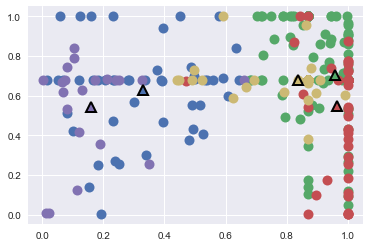

In [112]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], km.labels_, markers='o')
mglearn.discrete_scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2, 3, 4],
    markers='^', markeredgewidth=2)